In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
%matplotlib inline
warnings.filterwarnings('ignore')

In [40]:
path = r"Data\Automobile_data1.csv"
path2 = r"Data\Automobile_data.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [6]:
df.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


(array([81., 45., 35., 17.,  8.,  4.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

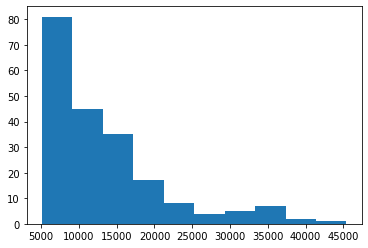

In [7]:
plt.hist(df.price)

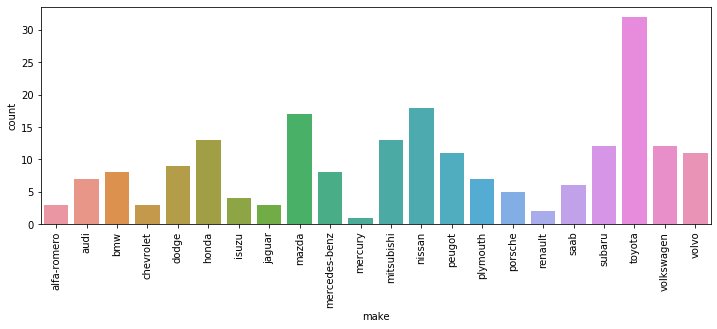

In [33]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=90)
sns.countplot(df.make)

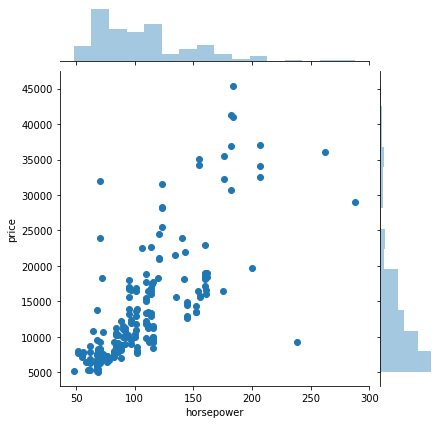

In [35]:
sns.jointplot(df.horsepower, df.price)

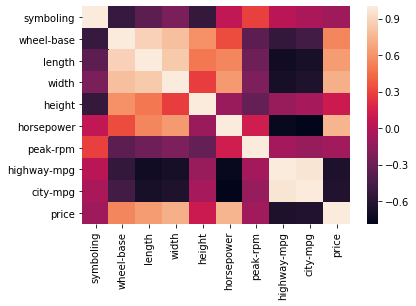

In [37]:
sns.heatmap(df.corr())

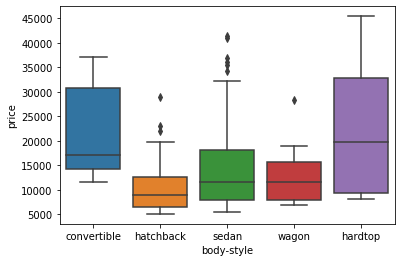

In [39]:
sns.boxplot(df["body-style"], df.price)

In [95]:
df2 = pd.read_csv(path2)
df2 = df2.replace("?", np.NaN)
df2 = df2.astype({"normalized-losses":float,"horsepower":float})
df2 = df2.fillna(df2.mean())

In [108]:
for fea in df2._get_numeric_data().columns:
    if skew(df2[fea])>1:
        df2[fea] = np.sqrt(df2[fea])

In [112]:
le = LabelEncoder()
for fea in df2.select_dtypes("object").columns:
    df2[fea] = le.fit_transform(df2[fea])

In [117]:
df2['area'] = df2['height'] * df2['width']

In [118]:
df2.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,116.167982,3128.08
1,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,128.452326,3128.08
2,1,122.0,0,1,2,2,0,65.5,52.4,5,12.328828,12.409674,19,26,128.452326,3432.20
3,2,164.0,1,1,3,1,0,66.2,54.3,3,10.440307,10.099505,24,30,118.110118,3594.66
4,2,164.0,1,1,3,0,0,66.4,54.3,3,11.661904,10.723805,18,22,132.098448,3605.52
